In [10]:
import pandas as pd
import numpy as np
import plotly.express as ptx
import plotly.io as pio
from pandasql import sqldf
from datetime import datetime as dt

In [11]:
from IPython.display import display
from IPython.display import HTML
from IPython.display import Image

In [12]:
## reading the csv files and storing to dataframes

users = pd.read_csv("USER_TAKEHOME.csv")
prod = pd.read_csv("PRODUCTS_TAKEHOME.csv")
tnx = pd.read_csv("TRANSACTION_TAKEHOME.csv")

In [13]:
## Checking samples from each dataset
tbl = ["users","prod","tnx"] ## users, products, transactions

for t in tbl:
    df = eval(t)
    display(HTML(f"<b> For table - {t}</b>"))
    display(df.head())
    print("__"*70)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


____________________________________________________________________________________________________________________________________________


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


____________________________________________________________________________________________________________________________________________


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


____________________________________________________________________________________________________________________________________________


At a quick glance, I see null values in the *gender* and *birth_date* fields in **Users**, *barcode* and *final_sale* in **Transactions**. To investigate further I'm writing a quick `.info()` to check nulls and total values in the key fields for each table

In [14]:
tbl = ["users","prod","tnx"]

for t in tbl:
    df = eval(t)
    display(HTML(f"<b> For table - {t}</b>"))
    display(df.info())
    print("--"*20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


None

----------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


None

----------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


None

----------------------------------------


* I see that there are null values in the **Product** table's *BARCODE* column which is something to keep in mind while performing joins (as there are also null values in the *BARCODE* in the **Transactions** table. The *BARCODE* column is also in a XXe+N format, where e+N is the exponent, and this can cause issues while joining with the **Transactions** table

* In the **Users** table not all users have *BIRTH_DATE* values as evidenced by some nulls

* In the **Transactions** table some receipts are missing barcodes. And from the `head()` function I know that some transactions are also missing the *FINAL_QUANTITY* and *FINAL_SALE* figures

As a last step, I am interested in checking the *birth_date* and the *created_date* column to check for any outliers in terms of how old/young a person is and when their record was created (I'm going to use older than 100 and younger than 5 as a rule-of-thumb). And, if there are such users, whether or not they have any transactions

In [15]:
## Converting the string columns containing datetimes to datetime type

users["BIRTH_DATE"] = pd.to_datetime(users["BIRTH_DATE"], utc = True)
users["CREATED_DATE"] = pd.to_datetime(users["CREATED_DATE"], utc = True)

In [16]:
## creating a new column that is truncated down to month and year for ease of calculating age
users["BIRTH_MONTH_YEAR"] = users["BIRTH_DATE"].dt.strftime("%Y-%b")

## Investigating users who are older than 100 or younger than 5 by creating a flag column for either case
users["AGE_G100"] = np.where(users["BIRTH_MONTH_YEAR"] <= '1924-Feb', 1, 0)
users["AGE_L5"] = np.where(users["BIRTH_MONTH_YEAR"] >= '2020-Feb', 1, 0)

In [17]:
print("Number of users older than 100 = ", np.sum(users["AGE_G100"]))
print("Number of users younger than 5 = ", np.sum(users["AGE_L5"]))

Number of users older than 100 =  62
Number of users younger than 5 =  10


In [18]:
## Checking to see if our age outliers have any transactions in the transactions table

tnx_g100 = pd.merge(users[users["AGE_G100"]==1], tnx, left_on = "ID", right_on = "USER_ID", how = "inner")
tnx_l5 = pd.merge(users[users["AGE_L5"]==1], tnx, left_on = "ID", right_on = "USER_ID", how = "inner")

display(tnx_g100.shape)
display(tnx_l5.shape)

(0, 17)

(0, 17)

The total number of users that are older than 100 or younger than 5 is 72, out of a base of 100K users. This is a number I would be comfortable dropping altogether. I check whether or not they have any transactions in the **Transactions** table and, as I had suspected, they do not. Either way, I retain the filters for these flags in the SQL queries since it reduces the dataset size prior to a join

### What are the top 5 brands by receipts scanned among users 21 and over?

In [19]:
## Pandas SQL implementation 

# explicityly type casting the barcode columns to prevent issues during joins
prod["BARCODE"] = prod["BARCODE"].astype(str)
tnx["BARCODE"] = tnx["BARCODE"].astype(str)

pysqldf = lambda q: sqldf(q, globals())  # For global access to DataFrames

# I'm taking the liberty to hardcode 2004-Feb for getting 21+ users since pandasql doesn't have a straightforward way to get difference
# in years or months between two dates. In the interest of readability I'm avoiding the longer statements

query = """

WITH users_filt AS (
SELECT * FROM users WHERE BIRTH_MONTH_YEAR<= '2004-Feb' and AGE_G100!=1 and AGE_L5!=1
),
tnx_filt AS (
SELECT t.*, uf.BIRTH_MONTH_YEAR FROM tnx as t
 INNER JOIN users_filt as uf
 on t.USER_ID = uf.ID
 ),
prod_tnx_join AS (
SELECT p.BRAND, count(distinct tf.RECEIPT_ID) as brand_cnt
FROM tnx_filt as tf
 LEFT JOIN prod as p
  on coalesce(tf.BARCODE,'Null Barcode') = coalesce(p.BARCODE,'Null Barcode')
GROUP BY 1
)
SELECT brand, brand_cnt FROM prod_tnx_join
WHERE brand != 'None'
ORDER BY brand_cnt DESC
LIMIT 5
;
"""

result = pysqldf(query)
display(result)

,BRAND,brand_cnt
0,DOVE,14
1,NERDS CANDY,14
2,COCA-COLA,13
3,HERSHEY'S,13
4,SOUR PATCH KIDS,13


### What are the top 5 brands by sales among users that have had their account for at least six months?

In [20]:
## Pandas SQL implementation 

users["CREATED_MONTH_YEAR"] = users["CREATED_DATE"].dt.strftime("%Y-%b")

query_1 = """

WITH users_filt AS (
SELECT * FROM users WHERE CREATED_MONTH_YEAR<='2024-Aug' and AGE_G100!=1 and AGE_L5!=1
),
tnx_filt AS (
SELECT t.*, uf.CREATED_MONTH_YEAR FROM tnx as t
 INNER JOIN users_filt as uf
 on t.USER_ID = uf.ID
 ),
prod_tnx_join AS (
SELECT p.BRAND, sum(FINAL_SALE) as sales
FROM tnx_filt as tf
 LEFT JOIN prod as p
  on coalesce(tf.BARCODE,'Null Barcode') = coalesce(p.BARCODE,'Null Barcode')
GROUP BY 1
)
SELECT brand, sales FROM prod_tnx_join
WHERE BRAND != 'None'
ORDER BY sales DESC
LIMIT 5
;
"""

result1 = pysqldf(query_1)
display(result1)

,BRAND,sales
0,COCA-COLA,2590.58
1,ANNIE'S HOMEGROWN GROCERY,2383.92
2,DOVE,2327.47
3,BAREFOOT,2284.59
4,ORIBE,2085.93


**NOTE**: In the two pandasql implementations above, I took the liberty to hardcode `2004-Feb` and `2024-Aug` for 21+ users and for users with accounts 6 months or older (respectively) since pandasql doesn't have a straightforward way to get difference in years (or months) between two dates. In the interest of readability I'm avoiding the longer statements

### Who are Fetch’s power users?

In obtaining power users, I'm pulling 

* total user purchase amounts by user,
* distinct receipt counts by user, and
* distinct scan dates by user

Even though sales amount could've been enough, I saw it has some outliers, i.e. users that are very high spenders but not necessarily frequent scanners or shoppers. As a result, I'm using a combo of all 3 columns (I use distinct receipt counts to identify frequent shoppers and distinct scan date counts as a proxy for app usage)

In [21]:
tnx["FINAL_SALE"] = pd.to_numeric(tnx["FINAL_SALE"], errors = 'coerce') # converting final_sale to numeric from string

tnx ["SCAN_DATE"] = pd.to_datetime(tnx["SCAN_DATE"], utc = True) # converting scan_date to datetime format
tnx["SCAN_DATE_TRUNC"] = tnx["SCAN_DATE"].dt.strftime('%Y-%m-%d') # truncating scan_date to remove the time portion

In [22]:
#Aggregating final_sale, receipt_id count and scan_date count by user_ids

user_tnx = tnx.groupby("USER_ID")["FINAL_SALE"].sum().reset_index().sort_values(by ='FINAL_SALE', ascending = False)
user_purc = tnx.groupby("USER_ID")["RECEIPT_ID"].nunique().reset_index().sort_values(by ='RECEIPT_ID', ascending = False)
user_scan = tnx.groupby("USER_ID")["SCAN_DATE_TRUNC"].nunique().reset_index().sort_values(by ='SCAN_DATE_TRUNC', ascending = False)

In [23]:
## Obtaining the 75th percentile values for sales amount, distinct receipt count and distinct scan dates

sales_perc = user_tnx["FINAL_SALE"].quantile(0.75)
purchase_perc = user_purc["RECEIPT_ID"].quantile(0.75)
scan_perc = user_scan["SCAN_DATE_TRUNC"].quantile(0.75)

*Note*: *Initially I was pulling user ids using just the **Transactions** table and I ended up with 200+ user ids. However, on joining with the **Users**, I found that most users weren't present in the users table - I was getting only 16 users. The actual number of power users, as such, is a lot more than I'm getting information for.*

The approach I ended up using - below - is to first filter the **Transactions** table with `user_ids` that are present in the **Users** table and then performing my percentile filtering to arrive at the power users

In [24]:
query_2 = f"""

with user_hist as (
select user_id
       ,gender
       ,birth_month_year
       ,count(distinct receipt_id) as cnt_rec
       ,count(distinct scan_date_trunc) as dist_scan_Date
       ,sum(final_sale) as money_spent
from tnx as t
join users as u
 on t.user_id = u.id
group by 1, 2, 3
order by cnt_rec desc, dist_scan_Date desc, money_spent desc
),
frequent_scanners as (
select user_id, gender, birth_month_year
from user_hist
where dist_scan_Date >= {scan_perc}
),
multi_item_shoppers as (
select user_id, gender, birth_month_year
from user_hist
where cnt_rec >= {purchase_perc}
),
high_spenders as(
select user_id, gender, birth_month_year
from user_hist
where money_spent >= {sales_perc}
)
select a.user_id, a.gender, a.birth_month_year
from frequent_scanners as a
 inner join multi_item_shoppers as b
  on a.user_id = b.user_id
 inner join high_spenders as c
  on a.user_id = c.user_id;
"""

result2 = pysqldf(query_2)

In [25]:
## converting birth_month_year to datetime format
result2["birth_month_year"] = pd.to_datetime(result2["birth_month_year"], format = '%Y-%b')

##calculating age using 2025-February as the reference point
result2["age"] = dt.strptime('2025-Feb', '%Y-%b').year- result2["birth_month_year"].dt.year

In [38]:
## defining age buckets for a basic bar chart to show the age groups and gender power users fall in

buckets = ['20-35','35-50','50-65','65-80']
bins = [20, 35, 50, 65, 80]

In [39]:
result2["age_bucket"] = pd.cut(result2["age"], bins = bins, labels = buckets, right = True)

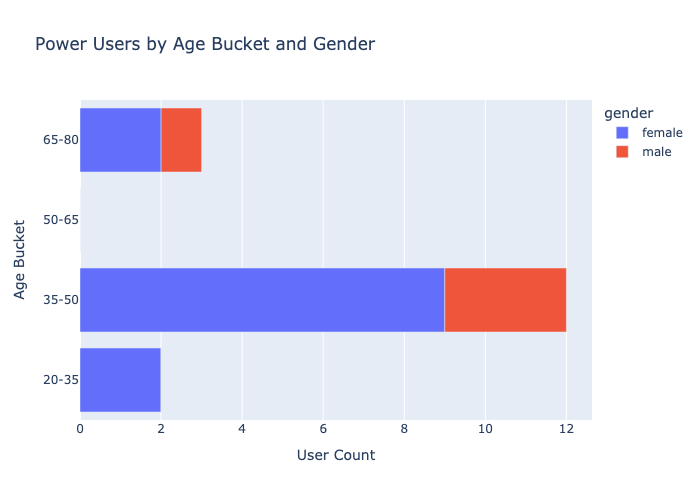

In [40]:
fig = ptx.bar(result2.groupby(["age_bucket","gender"], observed=False).size().reset_index(name = "count"), 
        y="age_bucket", x="count", labels = {"age_bucket":"Age Bucket","count":"User Count"},
        orientation='h', color = "gender", title = "Power Users by Age Bucket and Gender")

pio.write_image(fig, "power_users.png")

Image("power_users.png")

There are many other approaches to getting power users - the approach I have used is, arguably, a little restrictive and leads to a smaller cohort. The criteria can loosened up and/or changed by -

* Lowering the percentile threshold
* Not conisidering the overlap of top 25% of spenders and scanners and receipt - I could consider 2 of these or just 1 depending on the use case
* Looking at count of distinct brands a user purchased and taking a top % from there

In [29]:
## Raw data table of power users

display(result2)

,user_id,gender,birth_month_year,age,age_bucket
0,62ffec490d9dbaff18c0a999,female,1951-12-01,74,65-80
1,62c09104baa38d1a1f6c260e,female,1978-03-01,47,35-50
2,610a8541ca1fab5b417b5d33,male,1977-01-01,48,35-50
3,5c366bf06d9819129dfa1118,female,1989-04-01,36,35-50
4,6528a0a388a3a884364d94dc,female,1988-06-01,37,35-50
5,61a58ac49c135b462ccddd1c,female,1996-05-01,29,20-35
6,643059f0838dd2651fb27f50,male,1954-10-01,71,65-80
7,6351760a3a4a3534d9393ecd,female,1984-12-01,41,35-50
8,64dd9170516348066e7c4006,female,1993-12-01,32,20-35
9,5b441360be53340f289b0795,female,1982-09-01,43,35-50


### Appendix - Composition of users table by generation and gender

In [32]:
users["BIRTH_MONTH_YEAR"] = pd.to_datetime(users["BIRTH_MONTH_YEAR"], format = '%Y-%b')

users["age"] = dt.strptime('2025-Feb', '%Y-%b').year- users["BIRTH_MONTH_YEAR"].dt.year

buckets = ['Gen Z','Millenial','Gen X','Baby Boomer', 'Silent Generation']
bins = [13, 29, 45, 61, 80, 97]

users["age_bucket"] = pd.cut(users["age"], bins = bins, labels = buckets, right = True)

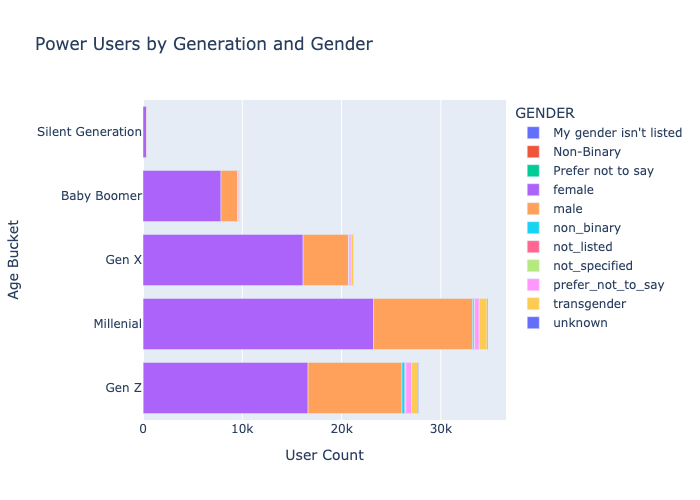

In [42]:
fig2 = ptx.bar(users.groupby(["age_bucket","GENDER"], observed=False).size().reset_index(name = "count"), 
        y="age_bucket", x="count", labels = {"age_bucket":"Age Bucket","count":"User Count"},
        orientation='h', color = "GENDER", title = "Power Users by Generation and Gender")

pio.write_image(fig2, "user_gen.png")

Image("user_gen.png")